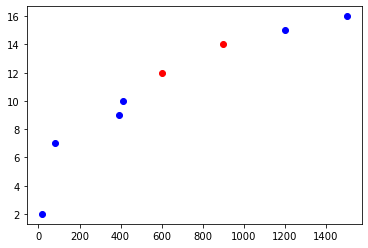

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import math
from pprint import pprint

# Read data from csv file
data = []
with open('data.csv') as f:
    data = [list(map(float, i)) for i in csv.reader(f)]
    # random.shuffle(data)
    
# Make train sets
x_train = np.array(list(map(lambda x: x[0], data[:6])), dtype='float')
y_train = np.array(list(map(lambda y: y[1], data[:6])), dtype='float')

# Make validation sets
x_val = np.array(list(map(lambda x: x[0], data[6:])), dtype='float')
y_val = np.array(list(map(lambda y: y[1], data[6:])), dtype='float')

plt.scatter(x_train, y_train, c='blue')
plt.scatter(x_val, y_val, c='red')
plt.show()

Best fitted model to training data:


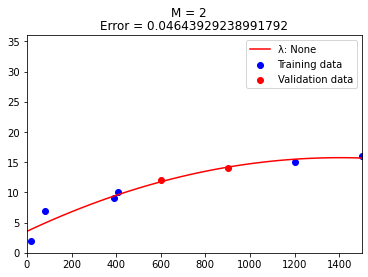

Best model:


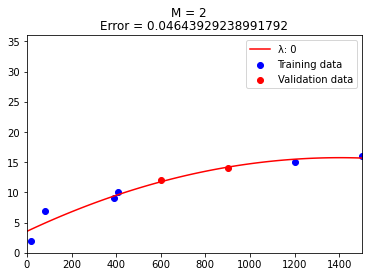

In [31]:
# Actual polynomial output value
def polynomial_output(x, w): 
    return np.sum([param[0] * x ** i for i, param in enumerate(w)], axis=0)


# Design matrix
def dm(x_train, M): 
    return np.array([[x ** j for j in range(M + 1)] for x in x_train], dtype='float')


# Mean squared error
def MSE(x, y, w):
    return np.mean(np.square(y - polynomial_output(x, w)))


# Draw model
def plot_model(w, x_train, y_train, x_val, y_val, M=None, error=None, lambda_=None):
    x = np.linspace(0, max(x_train) + 1, 100)
    y = polynomial_output(x, w)
    
    plt.scatter(x_train, y_train, c='blue', label='Training data')
    plt.scatter(x_val, y_val, c='red', label='Validation data')
    plt.plot(x, y, c='red', label=f'λ: {lambda_}')

    plt.xlim(right=max(x_train) + 1, left=0)
    plt.ylim(top=max(y_train) + 20, bottom=0)
    
    if error:
        plt.title(f'Error = {error}')
    plt.suptitle(f'M = {M}')
    plt.legend()
    plt.show()


# Model selection
M_range = range(1, 3)
lambdas = [0, 0.01, 0.03]

# First we need to find the power of polynomial 
# by choosing the best model with the least training error.
y = y_train[:, None]
models = []

for M in M_range:
    X = dm(x_train, M)
    w = np.linalg.inv(X.transpose() @ X) @ X.transpose() @ y  # https://en.wikipedia.org/wiki/Polynomial_regression#Matrix_form_and_calculation_of_estimates 
    models.append([w, MSE(x_val, y_val, w), M])
model = min(models, key=lambda x: x[1])

print('Best fitted model to training data:')
plot_model(model[0], x_train, y_train, x_val, y_val, M=model[2], error=model[1])

# Then we can avoid overfitting with regularization. 
regs = []
for regularization_lambda in lambdas:
    X = dm(x_train, model[2])
    w = np.linalg.inv(X.transpose() @ X + regularization_lambda * np.eye(model[2] + 1)) @ X.transpose() @ y
    regs.append([w, MSE(x_train, y_train, w), MSE(x_val, y_val, w), regularization_lambda, model[2]])
    
# Plot best model
print('Best model:')
lambda_ = min(regs, key=lambda x: x[2])
plot_model(lambda_[0], x_train, y_train, x_val, y_val, M=lambda_[4], error=lambda_[2], lambda_=lambda_[3])

In [32]:
# Test
ranks = [
    'Silver 1', 
    'Silver 2', 
    'Silver 3', 
    'Silver 4', 
    'Silver Elite', 
    'Silver Elite Master', 
    'Gold Nova 1', 
    'Gold Nova 2', 
    'Gold Nova 3',
    'Gold Nova Master',
    'Master Guardian 1',
    'Master Guardian 2',
    'Master Guardian Elite',
    'Distinguished Master Guardian',
    'Legendary Eagle',
    'Legendary Eagle Master',
    'Supreme Master First Class',
    'The Global Elite'
]

x = 43
y = polynomial_output(x, w)
print(y)
print(f'Hours: {x}, Rank: {ranks[math.floor(y) - 1]}')

4.2386368111367565
Hours: 43, Rank: Silver 4


In [33]:
x_train = []
y_train = []

x_val = []
y_val = []


def read_data(fn):
    with open(fn) as f:
        data = [list(map(float, i)) for i in csv.reader(f)]
        #random.shuffle(data)
        global x_train, y_train, x_val, y_val
        x_train = np.array(list(map(lambda x: x[0], data[:6])), dtype='float')
        y_train = np.array(list(map(lambda x: x[1], data[:6])), dtype='float')
        
        x_val = np.array(list(map(lambda x: x[0], data[6:])), dtype='float')
        y_val = np.array(list(map(lambda x: x[1], data[6:])), dtype='float')


# Find y = k0 + k1x + k2x^2 + etc
def polynomial(x, w):
    return np.sum([w[i] * x ** i for i in range(np.shape(w)[0])], axis=0)
        

# Find MSE between predicted and actual output
def mean_square_error(x, y, w):
    return np.mean(np.square(y - polynomial(x, w)))

    
# Create Design Matrix for polynomial in power M
def design_matrix(x_train, M):
    return np.array([[x ** j for j in range(M + 1)] for x in x_train], dtype='float')


# Find parameters of polynomial and error prediction
def regularized_least_squares(x_train, y_train, M, regularization_lambda):
    dm = design_matrix(x_train, M)
    w = np.linalg.inv(np.transpose(dm) @ dm + (regularization_lambda * np.eye(dm.shape[1]))) @ np.transpose(dm) @ y_train
    return w, mean_square_error(x_train, y_train, w)


def least_squares(x_train, y_train, M):
    dm = design_matrix(x_train, M)
    w = np.linalg.inv(dm.transpose() @ dm) @ dm.transpose() @ y_train
    return w, mean_square_error(x_train, y_train, w)


def model_selection(x_train, y_train, x_val, y_val, M_values):
    models = []
    for M in M_values:
        w, train_err = least_squares(x_train, y_train, M)
        plt.scatter(x_train, y_train, c='blue')
        plt.scatter(x_val, y_val, c='red')

        x = np.linspace(0, 2000, 10000)
        y = [polynomial(i, w) for i in x]
        
        plt.plot(x, y, c='red')

        plt.xlim(right=max(x_train), left=0)
        plt.ylim(top=max(y_train) + 20, bottom=0)

        plt.show()
        models.append([w, train_err, mean_square_error(x_val, y_val, w), M])
    return min(models, key=lambda x: x[2])


# Model selection by the least training error
def regularized_model_selection(x_train, y_train, x_val, y_val, M, lambdas):
    model = []
    for regularization_lambda in lambdas:
        w, train_error = regularized_least_squares(x_train, y_train, M, regularization_lambda)
        
        plt.scatter(x_train, y_train, c='blue', label='Train')
        plt.scatter(x_val, y_val, c='red', label='Validation')

        x = np.linspace(0, 2000, 10000)
        y = [polynomial(i, w) for i in x]
        
        plt.plot(x, y, c='red', label=f'λ = {regularization_lambda}')

        plt.xlim(right=max(x_train), left=0)
        plt.ylim(top=max(y_train) + 20, bottom=0)

        plt.title(f'Error = {train_error}')
        plt.suptitle(f'M = {M}')
        plt.legend()
        plt.show()
        
        model.append([w, train_error, mean_square_error(x_val, y_val, w), regularization_lambda])
    return min(model, key=lambda x: x[2])

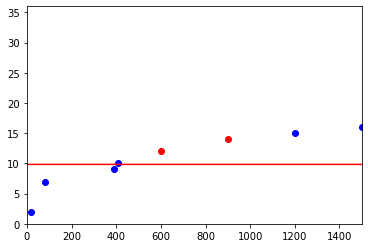

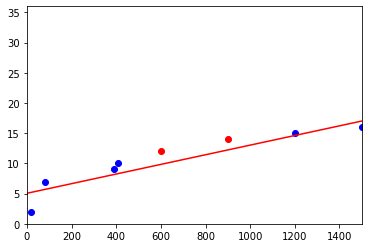

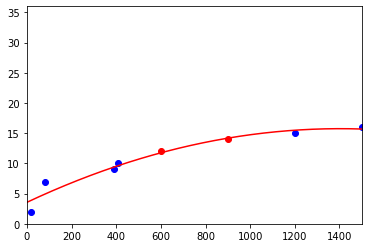

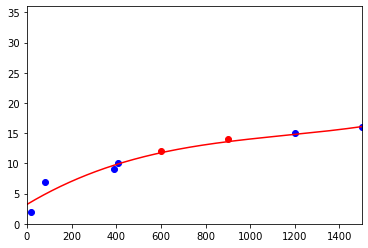

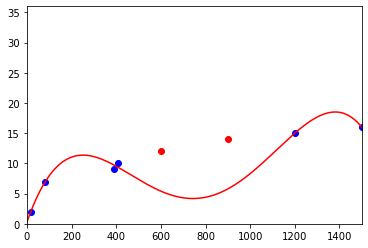

Best M = 2


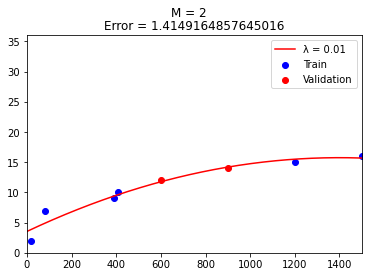

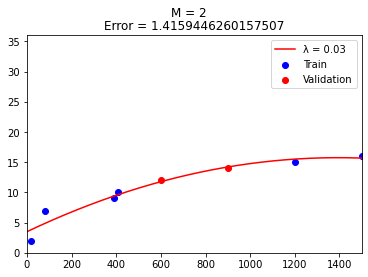

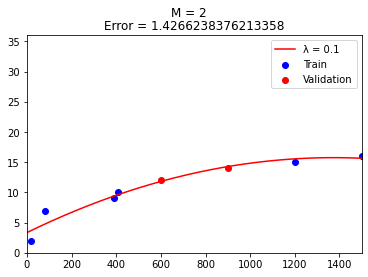

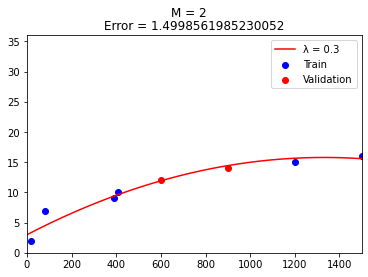

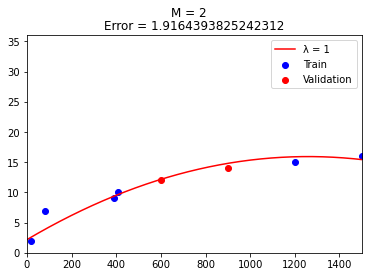

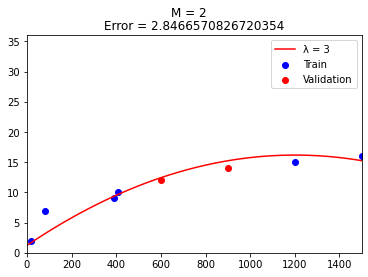

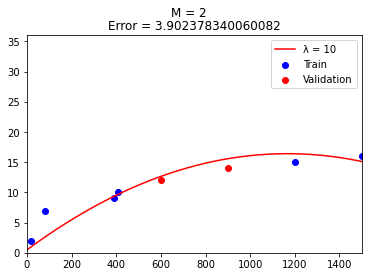

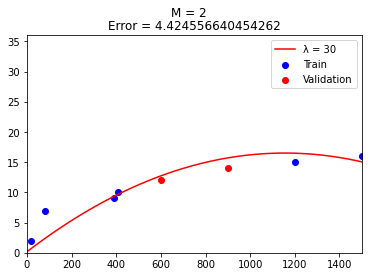

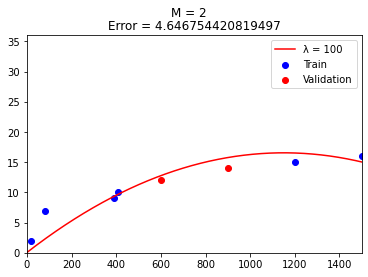

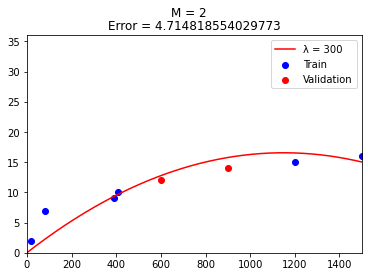

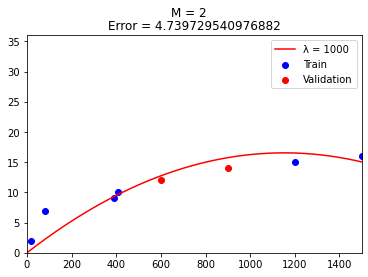

[ 3.53820285e+00  1.74415217e-02 -6.22844602e-06] Lambda: 0.01 M = 2


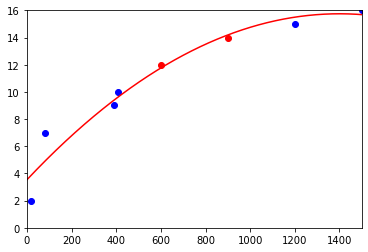

In [34]:
read_data('data.csv')

w, train_error, mse, M = model_selection(x_train, y_train, x_val, y_val, range(0, 5))

print('Best M =', M)

# --------------------------------------

lambdas = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]

w, train_error, mse, best_lambda = regularized_model_selection(x_train, y_train, x_val, y_val, M, lambdas)
print(w, 'Lambda:', best_lambda, 'M =', M)

plt.scatter(x_train, y_train, c='blue')
plt.scatter(x_val, y_val, c='red')

x = np.linspace(0, 2000, 10000)
y = polynomial(x, w)

plt.plot(x, y, c='red')

plt.xlim(right=max(x_train), left=0)
plt.ylim(top=max(y_train), bottom=0)

plt.show()